# TP4 : K-nearest neighbours & cython
# SDIA - Python 
## Adrien HANS & Tanguy JEANNEAU

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Classification using K-nearest neighbours algorithm

This practical is a first introduction to classification using the most intuitive non parametric method : K nearest neighbours. The principle is the following. A set of labelled observations which can belong to 2 classes is given as a learning set. Then new observations must be classified as either of class 1 or 2. The principle of K-NN is to label a new observation from the most frequent label among its K nearest neighbours.

### Exercise 1 : * Using synthetic data*



We Load the training and test data sets `synth_train.txt` and `synth_test.txt`. Targets belong to {1,2} and entries belong to $\mathbb{R}^2$. We have 100 training data samples and 200 test samples.
    * the 1st column contains the label of the class the sample,
    * columns 2 & 3 contain the coordinates of each sample in 2D.







We load the training and test sets :

In [2]:
# load the training set
train = np.loadtxt('synth_train.txt') 
#...,delimiter=',') if there are ',' as delimiters
class_train = train[:,0]
x_train = train[:,1:]
N_train = train.shape[0]
train = np.array(train)

In [3]:
# load the test set
test = np.loadtxt('synth_test.txt')
class_test_1 = test[test[:,0]==1]
class_test_2 = test[test[:,0]==2]
x_test = test[:,1:]
N_test = test.shape[0]
test = np.array(test)

#### a.  Display the training set and distinguish the two classes. The function scatter can be useful.
We display the training set : 

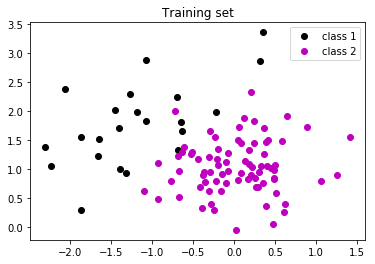

In [4]:
plt.figure()
plt.plot(train[class_train==1,1],train[class_train==1,2],'ko',label = 'class 1') # class 1 in black
plt.plot(train[class_train==2,1],train[class_train==2,2],'mo',label='class 2') # class 2 in magenta
plt.title('Training set')
plt.legend()
plt.show()

We also display the test set :

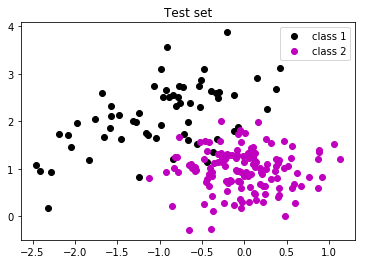

In [5]:
plt.figure()
plt.plot(class_test_1[:,1],class_test_1[:,2],'ko',label = 'class 1')
plt.plot(class_test_2[:,1],class_test_2[:,2],'mo',label = 'class 2')
plt.title('Test set')
plt.legend()
plt.show()

#### b. Implement the K-nearest neighbours algorithm for classification.

We implement the function knn to compute the K-nearest neighbours algorithm for classification : 
There is two functions : getNeighbours(training, test, k) which gets the k neighbours of a test set, and the function KNN which is able, by calling getNeighbours, to give the target of a test set by looking at the k nearest neighbours of it. 

In [6]:
import operator
"""
The function getNeighbours permits to get the k neighbours of a test_set

@Inputs : 
    -training : list, the trianing set with target in the first column and features on the others
    -test : list, the test 
    -k : int, the number of neighbours of the test set one wants to have. 
    
@Outputs : 
    -neigbours, the list of neighbours 
"""

def getNeighbours(training, test, k):
    distances = [(x, np.linalg.norm(test[1:] - x[1:])) for x in training]
    sorted_distances = sorted(distances,key=operator.itemgetter(1))
    neighbours = [sorted_distances[i][0] for i in range(k)]
    return neighbours

"""
the function KNN(train,test,k) gives targets to the test set by looking at the targets of the k nearest neighbours.

@Inputs : 
    -train : list, the training set with the targets in the first column. 
    -test : list, the test
    -k : int, the number of nearest neighbours one wants to evaluate the target of the test set on. 
@Outputs : 
    -result : float, the target of the test tested. 
"""
def KNN(train,test,k):
    neighbours = np.array(getNeighbours(train, test, k))
    sorted_neighbours = np.sort(neighbours[:,0])
    cat=list(set(sorted_neighbours))
    votes=np.array([[c, len(sorted_neighbours[sorted_neighbours == c])] for c in cat])
    result=sorted(votes, key=operator.itemgetter(1), reverse=True)[0][0]
    return result

#### c. Compute the error rate on the training set and the test set for K = 1,...,30.

In [7]:
#We compute the correctness for each k from 1 to 30 
List_error=[]
n=30
result=0

for k in range(1,n+1):
    nb_errors=0
    for x in test:
        result=KNN(train,x,k)
        if result != x[0]:
            nb_errors+=1
    List_error.append((1-(nb_errors/N_test)) * 100)

We plot the evolution of the correctness with k : 

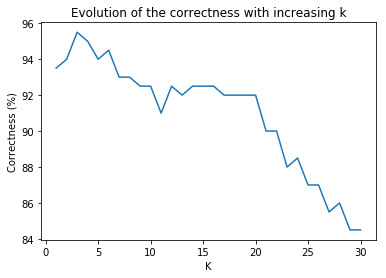

In [8]:
plt.plot([k for k in range(1,n+1)],List_error)
plt.title('Evolution of the correctness with increasing k')
plt.ylabel('Correctness (%)')
plt.xlabel('K')
plt.show()

We show the values in a table : 

In [9]:
for k in range(1,n+1):
    print('k = ', k, 'Correctness = ',List_error[k-1], "%" )

k =  1 Correctness =  93.5 %
k =  2 Correctness =  94.0 %
k =  3 Correctness =  95.5 %
k =  4 Correctness =  95.0 %
k =  5 Correctness =  94.0 %
k =  6 Correctness =  94.5 %
k =  7 Correctness =  93.0 %
k =  8 Correctness =  93.0 %
k =  9 Correctness =  92.5 %
k =  10 Correctness =  92.5 %
k =  11 Correctness =  91.0 %
k =  12 Correctness =  92.5 %
k =  13 Correctness =  92.0 %
k =  14 Correctness =  92.5 %
k =  15 Correctness =  92.5 %
k =  16 Correctness =  92.5 %
k =  17 Correctness =  92.0 %
k =  18 Correctness =  92.0 %
k =  19 Correctness =  92.0 %
k =  20 Correctness =  92.0 %
k =  21 Correctness =  90.0 %
k =  22 Correctness =  90.0 %
k =  23 Correctness =  88.0 %
k =  24 Correctness =  88.5 %
k =  25 Correctness =  87.0 %
k =  26 Correctness =  87.0 %
k =  27 Correctness =  85.5 %
k =  28 Correctness =  86.0 %
k =  29 Correctness =  84.5 %
k =  30 Correctness =  84.5 %


####  d. Comment on your results. Which value of K seems optimal ?
The correctness increases up to 95.5% at **K=3 and then decreases down to 84.5% for k=30.** 

Thus, the optimal value of K seems then to be **K=3**. 

**Plot :**
We can look at the true values of the test set and the values predicted with k=3 : 

In [10]:
#We compute the correctness for each k from 1 to 30 
Result_list=[]
result=0
k=3
for x in test:
    result=KNN(train,x,k)
    Result_list.append([result,x[1],x[2]])
    
Result_list=np.array(Result_list)

In [11]:
class_test_pred1 = Result_list[Result_list[:,0]==1]
class_test_pred2 = Result_list[Result_list[:,0]==2]

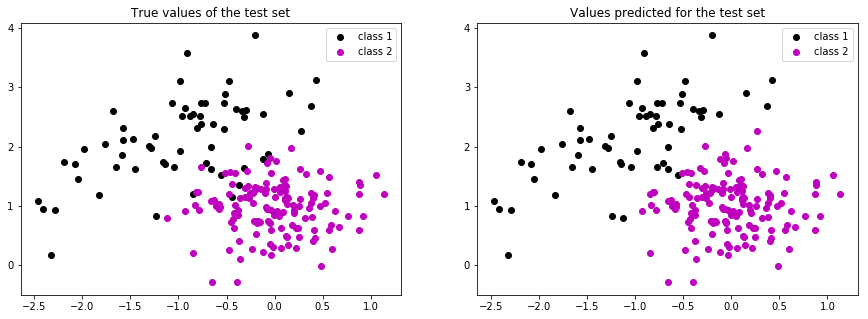

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(class_test_1[:,1],class_test_1[:,2],'ko',label = 'class 1')
plt.plot(class_test_2[:,1],class_test_2[:,2],'mo',label = 'class 2')
plt.title('True values of the test set')
plt.legend()

plt.subplot(1,2,2)
plt.plot(class_test_pred1[:,1],class_test_pred1[:,2],'ko',label = 'class 1')
plt.plot(class_test_pred2[:,1],class_test_pred2[:,2],'mo',label = 'class 2')
plt.title('Values predicted for the test set')
plt.legend()

plt.tight_layout
plt.show()

We can see some differencies, but seeing them is quite tricky. <br> We can also look at the values wich were not exactly predicted, whcich will be more visible :

In [13]:
#We compute the correctness for each k from 1 to 30 
Result_list_error=[]
result_error=0
k=3
for x in test:
    result_error=KNN(train,x,k)
    if result_error !=x[0]:
        Result_list_error.append([result_error,x[1],x[2]])
Result_list_error=np.array(Result_list_error)
error_class_test_pred1 = Result_list_error[Result_list_error[:,0]==1]
error_class_test_pred2 = Result_list_error[Result_list_error[:,0]==2]

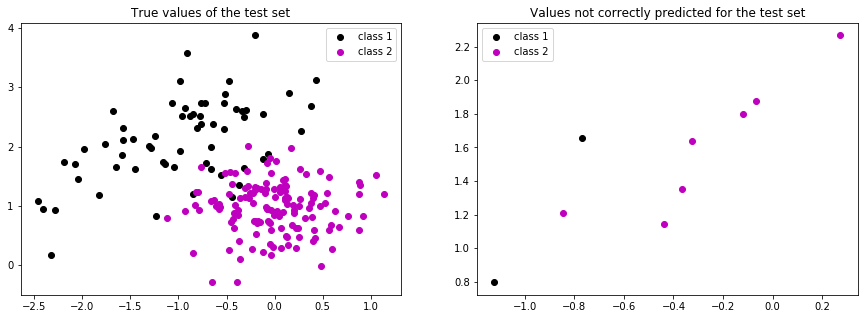

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(class_test_1[:,1],class_test_1[:,2],'ko',label = 'class 1')
plt.plot(class_test_2[:,1],class_test_2[:,2],'mo',label = 'class 2')
plt.title('True values of the test set')
plt.legend()

plt.subplot(1,2,2)
plt.plot(error_class_test_pred1[:,1],error_class_test_pred1[:,2],'ko',label = 'class 1')
plt.plot(error_class_test_pred2[:,1],error_class_test_pred2[:,2],'mo',label = 'class 2')
plt.title('Values not correctly predicted for the test set')
plt.legend()

plt.tight_layout
plt.show()

**As expected, we can clearly see that the test sets which were not exactly predicted were the ones which were close to the border of the two classes** 

### 2.  Application to a real data set : Breast cancer Wisconsin


We apply the same algorithm on a different data set consisting in detecting Breast cancer in Wisconsin. 
<br> Firstly, we extract the data from the file `wdbc12.data.txt`, and we separate the dataset in a training (the first 500 lines) and in a test set (the others).

In [15]:
import csv

srcfile = 'wdbc12.data.txt'
data = []
with open(srcfile) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        data.append(row)
data = np.float32(np.array(data)[:,1:])
train = data[:500,:]
test = data[500:,:]

We compute the KNN algorithm on this new dataset, searching the best k from 1 to 20 by looking at the accuracy of each attempt. 

In [16]:
Accuracy_dbc=[]
for k in range(1,31):
    nb_errors = 0
    for x in test:
        result = KNN(train, x, k)
        if result != x[0]:
            nb_errors += 1
    print('k = {0}: {1:.1f}% accuracy'.format(k, (1 - (nb_errors/len(test)))*100))
    Accuracy_dbc.append((1 - (nb_errors/len(test)))*100)

k = 1: 94.2% accuracy
k = 2: 91.3% accuracy
k = 3: 91.3% accuracy
k = 4: 91.3% accuracy
k = 5: 95.7% accuracy
k = 6: 94.2% accuracy
k = 7: 94.2% accuracy
k = 8: 95.7% accuracy
k = 9: 95.7% accuracy
k = 10: 95.7% accuracy
k = 11: 95.7% accuracy
k = 12: 95.7% accuracy
k = 13: 95.7% accuracy
k = 14: 95.7% accuracy
k = 15: 97.1% accuracy
k = 16: 95.7% accuracy
k = 17: 95.7% accuracy
k = 18: 95.7% accuracy
k = 19: 95.7% accuracy
k = 20: 94.2% accuracy
k = 21: 95.7% accuracy
k = 22: 95.7% accuracy
k = 23: 95.7% accuracy
k = 24: 95.7% accuracy
k = 25: 95.7% accuracy
k = 26: 95.7% accuracy
k = 27: 95.7% accuracy
k = 28: 95.7% accuracy
k = 29: 95.7% accuracy
k = 30: 95.7% accuracy


We plot the Accuracy of each attempt given the k used. 

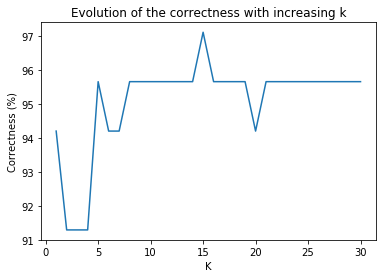

In [17]:
plt.plot([k for k in range(1,31)],Accuracy_dbc)
plt.title('Evolution of the correctness with increasing k')
plt.ylabel('Correctness (%)')
plt.xlabel('K')
plt.show()

The best results is given with **k = 15 with 97.1% accuracy** 
<br> The evolution of the results seems a little bit akward, but this would surely be corrected if we would have used a i-fold Cross Validation (for example a 10 fold Cross-Validation) which would have given more effective results. 

In [18]:
print(data.shape)

(569, 31)


Given the fact there are 31 columns in the dataset, which is to say 30 features plus the target, it is useless to try to plot the points of each measure like we did in the previous question. 

### 3. Making K-NN faster using `cython`

In [11]:
import KNN as cythonKNN
import KNN_not_working

In [12]:
%timeit -n 10 -r 10 cythonKNN.KNN(train, test[0], 5)

15.2 ms ± 3.79 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [13]:
%timeit -n 10 -r 10 KNN(train, test[0], 5)

19.4 ms ± 4.22 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


Cython is supposed to make the esecution of the python code faster. To this point, we just took the python code and compiled it ("cythonized") with setup.py and imported it. We can see that it only mildly impacts the speed of execution of the function KNN.

This is because we haven't declared variables as C type, but kept the code untouched.

I seems that Cython cannot actually execute any kind of python code as such, some structures are not recognized. For instance, lists by comprehension are not recognized by cython when created as a cdef variable, or algebric operations on numpy arrays are not valid when the arrays are casted into cython's memoryview.

It is thus necessary to completely refactor the code, which is not the goal of this exercise.

Let's examine the code and time it to see where the bottlenecks are

In [14]:
#The function getNeighbours permits to get the k neighbours of a test_set
def timedGetNeighbours(training, test, k):
    print('computing distances')
    %timeit distances = [(x, np.linalg.norm(test[1:] - x[1:])) for x in training]
    print('ttt')
    distances = [(x, np.linalg.norm(test[1:] - x[1:])) for x in training]
    print('sorting distances')
    %timeit sorted_distances = sorted(distances,key=operator.itemgetter(1))
    sorted_distances = sorted(distances,key=operator.itemgetter(1))
    neighbours = [sorted_distances[i][0] for i in range(k)]
    return neighbours


def timedKNN(train,test,k):
    neighbours = np.array(timedGetNeighbours(train, test, k))
    sorted_neighbours = np.sort(neighbours[:,0])
    cat=list(set(sorted_neighbours))
    print('couting KNNs votes')
    %timeit votes=np.array([[c, len(sorted_neighbours[sorted_neighbours == c])] for c in cat])
    votes=np.array([[c, len(sorted_neighbours[sorted_neighbours == c])] for c in cat])
    print('choosing the one')
    %timeit result=sorted(votes, key=operator.itemgetter(1), reverse=True)[0][0]
    result=sorted(votes, key=operator.itemgetter(1), reverse=True)[0][0]
    return result

In [15]:
k = 5
nb_errors = 0
x = test[0]
result = timedKNN(train, x, k)
print(result)

computing distances
15.2 ms ± 2.32 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
ttt
sorting distances
776 µs ± 181 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
couting KNNs votes
32.3 µs ± 7.58 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
choosing the one
12.4 µs ± 2.73 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
2.0


As we could've expected, the more computationally expensive operation is the computation of the distances between our point to evaluate and each point of the training set.

If we were to refactor this code for it to work on Cython, we would focus on this operation, since it is one of the most computationally expensive one.